# Portfolio Construction and Analysis:

# I. Analyzing Returns:

## 1. Returns:

In [7]:
import numpy as np
import pandas as pd

### - Reading data from a CSV file:

In [8]:
prices = pd.read_csv("data\\sample_prices.csv")
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [9]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [10]:
returns.head()

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544


In [11]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [12]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

<AxesSubplot:>

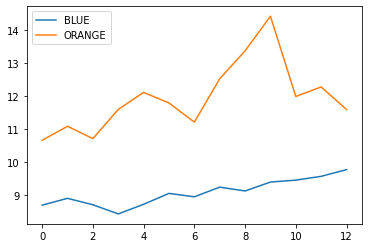

In [13]:
prices.plot()

<AxesSubplot:>

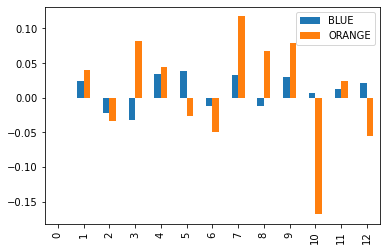

In [14]:
returns.plot.bar()

The mean of both blue and orange series are the same. However, the blue series are obviously less volatile than the orange series which means that the orange series are deviating away from the mean more often and more significantly than the blue series. 

### - Compounding Returns:

Now that we have a series of 12 monthly returns, we can produce the compounded return by multiplying the individual period returns, as long as the returns are expressed as growth rates in what I call "1+R" format.

To compound the returns, all we need to do is add 1 to each return and then multiply them. The result is itself in "1+R" format, so we need to subtract 1.

Let's compute the compounded return of our two series.

In [15]:
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [16]:
returns + 1

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


In [17]:
np.prod(returns+1)

BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [18]:
np.prod(returns+1)-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [19]:
(np.prod(returns+1)-1)*100

BLUE      12.331034
ORANGE     8.716698
dtype: float64

In [20]:
((np.prod(returns+1)-1)*100).round(2)

BLUE      12.33
ORANGE     8.72
dtype: float64

### - Annualizing Returns:

To annualize a return for a period, you compound the return for as many times as there are periods in a year. For instance, to annualize a monthly return you compund that return 12 times. 

For example, to annualize a 1% monthly, and 4% quarterly and a 0.01% daily return you would do:

In [21]:
rm = 0.01
(1+rm)**12 - 1

0.12682503013196977

In [22]:
rq = 0.04
(1+rq)**4 - 1

0.1698585600000002

In [23]:
rd = 0.0001
(1+rd)**252 - 1

0.025518911987694626

## 2. Volatility and Risk:
We've seen that the volatility is measured by the average squared deviation from the mean, which is the standard deviation.

Let's read the sample returns that we've been working with.

In [24]:
prices = pd.read_csv("data\\sample_prices.csv")
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


Notice that the first set of returns are NaN, which is Pandas way of saying that it's an NA. We can drop that row using the .dropna() method.

In [25]:
returns = returns.dropna()
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [26]:
returns.shape

(12, 2)

In [27]:
deviations = returns - returns.mean()
squared_deviations = deviations**2

number_of_obs = returns.shape[0]
mean_squared_deviations = squared_deviations.sum()/(number_of_obs-1)
volatility = np.sqrt(mean_squared_deviations)
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [28]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

The volatility based on annually data:

In [29]:
returns.std()*np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

### - Annualizing Volatility:

We annualize volatility by scaling (multiplying) it by the square root of the number of periods per observation

Therefore, to annualize the volatility of a monthly series, we muiltiply it by the square root of 12. Instead of using the np.sqrt() we can raise it to the power of  0.5

In [30]:
annualized_vol = returns.std()*(12**0.5)
annualized_vol

BLUE      0.083060
ORANGE    0.275747
dtype: float64

### - Risk Adjusted Returns:

Let's get beyond the sample data series and start working with some real data. Read in the monthly returns of a set of 10 portfolios formed on market caps, or market equities of the companies. Of the 10 portfolios, we only want to look at the largest cap and the smallest cap companies:

In [31]:
me_m = pd.read_csv("data\\Portfolios_Formed_on_ME_monthly_EW.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
me_m.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [32]:
cols = ['Lo 10', 'Hi 10']
returns = me_m[cols]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


Note that the data is already given in percentages (i.e 4.5 instead of 0.045) and we typically want to use the actual numbers (i.e. 0.045 instead of 4.5) so we should divide the raw data from the file by 100.

In [33]:
returns = returns/100

<AxesSubplot:>

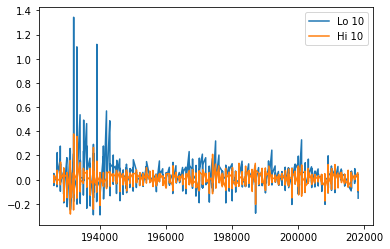

In [34]:
returns.plot()

<AxesSubplot:>

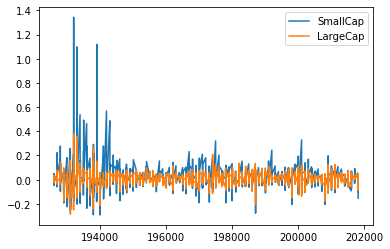

In [35]:
returns.columns = ['SmallCap', 'LargeCap']
returns.plot()

Large cap are much less volatile than small cap which means that the returns of large cap move around a lot less than the small cap stocks which are in blue.

In [36]:
returns.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [37]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [38]:
returns

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270
...,...,...
201808,0.0241,0.0234
201809,-0.0168,0.0087
201810,-0.1002,-0.0657
201811,-0.0365,0.0253


In [39]:
returns.shape

(1110, 2)

In [40]:
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months) - 1
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [41]:
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [42]:
annualized_return = (return_per_month + 1)**12-1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

Alternatively,

In [43]:
annualized_return = (returns+1).prod()**(12/n_months) - 1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

So now as we've got the returns and the risk, let's just measure a return on risk ratio. So, let's divide the annualized returns over the annualized volatility.

In [44]:
annualized_return/annualized_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

We conclude that large caps give us slightly higher return per unit of volatlity, 0.49 versus 0.45.

In [45]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

Small caps give us a slightly superior risk adjusted return over large cap stocks.

## 3. Computing Maximum Drawdown of a Return Series:

- The maximum drawdown is the maximum loss that could have been experienced from the previous high to a subsequent low.
- The maximum drawdown is the worst possible return that we could have seen if we buy an asset at its highest value and sold it at the bottom, " Bought High. Sold low".
- A drawdown can occur only if we lose money. The maximum drawdown is a measure of downside risk:
1. The first step of computing drawdowns is to construct a wealth index: Hypothetical Buy-And-Hold investment in the asset.
2. The second step is to look at the prior peak at any point in time: When the wealth rise and fall from inception.
3. We can plot the drawdowns over time to be able to see how long it takes to recover from the drawdowns.

- The Calmar ratio is defined as the ratio of the annualized return over the trailing 36 months to the maximum drawdown over those trailing 36 months.

First, let's read the return series we processed in the previous lab:

<AxesSubplot:>

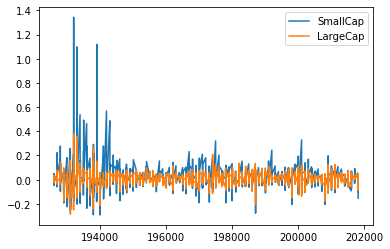

In [46]:
me_m = pd.read_csv("data\\Portfolios_Formed_on_ME_monthly_EW.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()

In [47]:
rets.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


### - Timeseries - forcing the index to be a datetime:

We asked Pandas to parse_dates in read_csv(). Let's check if it was able to do so with the index:

In [48]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

The dtype is int64 which suggests that it was not automatically converted to a date time index, so let's do that now manually. The simplest way to force it to be a timeseries is by reformatting the index data to a datetime type as follows:

In [49]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

Now that the DataFrame has a datetime index, we can treat the entire dataframe as a timeseries, which makes things very convenient. For instance, we can extract just the returns in 2008 as follows:

In [50]:
rets["2008"]

C:\Users\ZAKARIA\AppData\Local\Temp/ipykernel_18840/1232546118.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  rets["2008"]


,SmallCap,LargeCap
2008-01-01,-0.0436,-0.0490
2008-02-01,-0.0203,-0.0250
2008-03-01,-0.0440,-0.0122
2008-04-01,0.0027,0.0492
2008-05-01,0.0286,0.0161
2008-06-01,-0.0816,-0.1015
2008-07-01,-0.0079,-0.0140
2008-08-01,0.0110,0.0087
2008-09-01,-0.1274,-0.1155
2008-10-01,-0.2041,-0.1763


This looks good except that we know this is monthly data, and it's showing up with an index that is date stamped. We can fix this using the to_period method. We'll see several more examples of Pandas support for timeseries during the course.

In [51]:
rets.index = rets.index.to_period('M')
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [52]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


In [53]:
rets.describe()

,SmallCap,LargeCap
count,1110.000000,1110.000000
mean,0.017598,0.008870
std,0.106288,0.053900
min,-0.291400,-0.284300
25%,-0.027350,-0.017025
50%,0.010450,0.011400
75%,0.049950,0.037650
max,1.342900,0.377900


### - Computing Drawdowns:

- Convert the time series of returns to a time series that represents a wealth index
- Compute a time series of the previous peaks
- Compute the Drawdown which is the wealth index as the difference between the previous peak and the current value

Let's do this for Large Cap stocks.

In [54]:
wealth_index = 1000*(1+rets["LargeCap"]).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<AxesSubplot:>

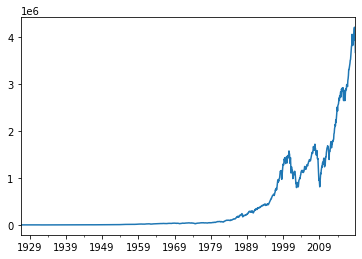

In [55]:
wealth_index.plot()

<AxesSubplot:>

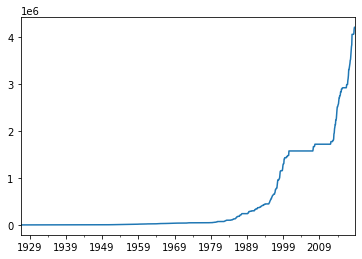

In [56]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

<AxesSubplot:>

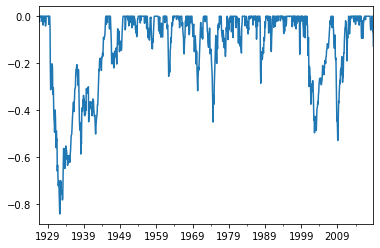

In [57]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In the crash of 1929, people lost more than 80% of their wealth compared to around 50% of their wealth in 2009.

In [58]:
drawdown.min()

-0.8400375277943123

<AxesSubplot:>

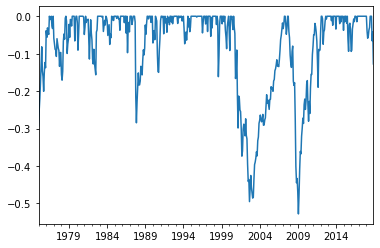

In [59]:
drawdown["1975":].plot()

In [60]:
drawdown["1975":].min()

-0.5280945042309304

In [61]:
drawdown["1975":].idxmin()

Period('2009-02', 'M')

In [62]:
drawdown.idxmin()

Period('1932-05', 'M')

### - Creating a Drawdown Function:

Redoing this analysis for SmallCap would be tedious, since we would need to re-enter all these commands at the prompt. Instead, let's create our first function that will form the first tool in our financial toolkit.

The function will take as input, a timeseries of returns, and return a timeseries as a DataFrame that contains the wealth index, the previous peaks and the drawdowns as a percent.

In [63]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Peaks": previous_peaks, 
                         "Drawdown": drawdowns})

drawdown(rets["LargeCap"]).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [64]:
drawdown(rets["LargeCap"])[["Wealth", "Peaks"]].head()

,Wealth,Peaks
1926-07,1032.900000,1032.900000
1926-08,1071.117300,1071.117300
1926-09,1078.293786,1078.293786
1926-10,1052.091247,1078.293786
1926-11,1080.497711,1080.497711


<AxesSubplot:>

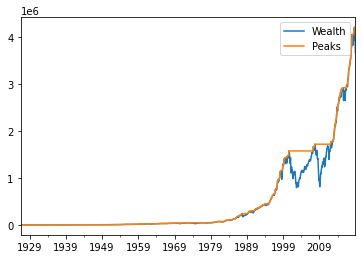

In [65]:
drawdown(rets["LargeCap"])[["Wealth", "Peaks"]].plot()

<AxesSubplot:>

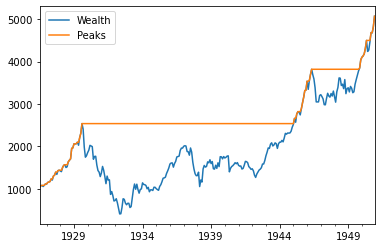

In [66]:
drawdown(rets[:"1950"]["LargeCap"])[["Wealth", "Peaks"]].plot()

In [67]:
drawdown(rets["LargeCap"]).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [68]:
drawdown(rets["LargeCap"]).min()

Wealth       405.769102
Peaks       1032.900000
Drawdown      -0.840038
dtype: float64

In [69]:
drawdown(rets["LargeCap"])["Drawdown"].min()

-0.8400375277943123

In [70]:
drawdown(rets["SmallCap"])["Drawdown"].min()

-0.8330007793945303

In [71]:
drawdown(rets["SmallCap"]).min()

Wealth      491.240323
Peaks       985.500000
Drawdown     -0.833001
dtype: float64

In [72]:
drawdown(rets["LargeCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [73]:
drawdown(rets["SmallCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [74]:
drawdown(rets["LargeCap"]["1975":])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [75]:
drawdown(rets["LargeCap"]["1975":])["Drawdown"].min()

-0.5280945042309303

In [76]:
drawdown(rets["SmallCap"]["1975":])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [77]:
drawdown(rets["SmallCap"]["1975":])["Drawdown"].min()

-0.6312068077252386

## 4. Building a Module:

In [78]:
import pandas as pd

def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

def get_ffme_returns():
    """
    Load the Fama-French Dataset for the returns of the Top and Bottom Deciles by MarketCap
    """
    me_m = pd.read_csv("data\\Portfolios_Formed_on_ME_monthly_EW.csv",
                       header=0, index_col=0, na_values=-99.99)
    rets = me_m[['Lo 10', 'Hi 10']]
    rets.columns = ['SmallCap', 'LargeCap']
    rets = rets/100
    rets.index = pd.to_datetime(rets.index, format="%Y%m").to_period('M')
    return rets

In [79]:
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [92]:
drawdown(rets["SmallCap"])["Drawdown"].min()

-0.8330007793945303

## 5. Deviations from Normality:

In [82]:
def get_hfi_returns():
    """
    Load and format the EDHEC Hedge Fund Index Returns
    """
    hfi = pd.read_csv("data\\edhec-hedgefundindices.csv",
                      header=0, index_col=0, parse_dates=True)
    hfi = hfi/100
    hfi.index = hfi.index.to_period('M')
    return hfi

hfi = get_hfi_returns()
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


### - Skewness:

Intuitively, a negative skew means that you get more negative returns than you would have expected if the returns were distributed like the normal distribution.

Another way of thinking about it is if that returns are normally distributed, the mean and the median would be very close.

However, if they are negatively skewed, the expected value i.e. the mean is less than the median. If they are positively skewed, the expected value (again, the mean) is greater than the median.

In [83]:
pd.concat([hfi.mean(), hfi.median(), hfi.mean() > hfi.median()], axis=1)

,0,1,2
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


Now, let's develop the code to compute the skewness of a series of numbers.

In [84]:
def skewness(r):
    """
    Alternative to scipy.stats.skew()
    Computes the skewness of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3

In [85]:
skewness(hfi).sort_values()

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

Just to see if we get the same answer, let's use the skewness function that is built into scipy.stats

In [86]:
import scipy.stats
scipy.stats.skew(hfi)

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

Finally, let's look at the skewness that you would expect from a truly random sequence of returns. Let's use the random normal generator from numpy and generate the same number of returns as we have for the hedge fund data.

In [87]:
hfi.shape

(263, 13)

In [95]:
normal_rets = np.random.normal(0, 0.15, size = (263, 1))

In [96]:
normal_rets.mean(), normal_rets.std()

(-0.01081995884303961, 0.15160186306567836)

In [97]:
skewness(normal_rets)

0.1229536385906804

### - Kurtosis:

Intuitively, the kurtosis measures the "fatness" of the tails of the distribution. The normal distribution has a kurtosis of 3 and so if the kurtosis of your returns is less than 3 then it tends to have thinner tails, and if the kurtosis is greater than 3 then the distribution has fatter tails.

In [100]:
def kurtosis(r):
    """
    Alternative to scipy.stats.kurtosis()
    Computes the kurtosis of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4

In [101]:
kurtosis(hfi).sort_values()

CTA Global                 2.952960
Long/Short Equity          4.523893
Global Macro               5.741679
Short Selling              6.117772
Funds Of Funds             7.070153
Distressed Securities      7.889983
Event Driven               8.035828
Merger Arbitrage           8.738950
Emerging Markets           9.250788
Relative Value            12.121208
Equity Market Neutral     17.218555
Convertible Arbitrage     23.280834
Fixed Income Arbitrage    29.842199
dtype: float64

In [102]:
scipy.stats.kurtosis(hfi)

array([20.28083446, -0.04703963,  4.88998336,  6.25078841, 14.21855526,
        5.03582817, 26.84219928,  2.74167945,  1.52389258,  5.73894979,
        9.12120787,  3.11777175,  4.07015278])

Note that these numbers are all lower by 3 from the number we have computed. That's because, as we said above, the expected kurtosis of a normally distributed series of numbers is 3, and scipy.stats is returning the Excess Kurtosis. We can see this by applying it on the random normal numbers we generated:

In [103]:
scipy.stats.kurtosis(normal_rets)

array([-0.48033178])

In [104]:
kurtosis(normal_rets)

2.5196682220442828

### - Running the Jarque-Bera Test for Normality:

The scipy.stats module contains a function that runs the Jarque-Bera test on a sequence of numbers. Let's apply that to the normally generated returns:

In [105]:
scipy.stats.jarque_bera(normal_rets)

Jarque_beraResult(statistic=3.1909461894881734, pvalue=0.2028125562479538)

The first number is the test statistic and the second number is the one we want. It represents the p-value for the hypothesis test. If you want to run the test at a 1% level of significance, you want this number to be greater than 0.01 to accept the hypothesis that the data is normally distributed, and if that number is less than 0.01 then you must reject the hypothesis of normality.

In this case, since we got a number higher than 0.01 we can accept the hypothesis that the numbers are random. Now, let's try this on our different hedge fund indices.

In [106]:
scipy.stats.jarque_bera(hfi)

Jarque_beraResult(statistic=25656.585999171326, pvalue=0.0)

Why didn't we get the results for the individual indices? Because the implementation of the test isn't smart enough to realize that we want to treat each column as a separate set of returns. 

In [108]:
import scipy.stats
def is_normal(r, level=0.01):
    """
    Applies the Jarque-Bera test to determine if a Series is normal or not
    Test is applied at the 1% level by default
    Returns True if the hypothesis of normality is accepted, False otherwise
    """
    statistic, p_value = scipy.stats.jarque_bera(r)
    return p_value > level

In [116]:
is_normal(normal_rets)

True

There are a few different ways to handle the problem. The first is to use the .aggregate method on a dataframe, that takes a function as an argument and applies that function to each column:

In [110]:
hfi.aggregate(is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [111]:
import scipy.stats
def is_normal(r, level=0.01):
    """
    Applies the Jarque-Bera test to determine if a Series is normal or not
    Test is applied at the 1% level by default
    Returns True if the hypothesis of normality is accepted, False otherwise
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(is_normal)
    else:
        statistic, p_value = scipy.stats.jarque_bera(r)
        return p_value > level

In [112]:
isinstance(hfi, pd.DataFrame)

True

### - Testing CRSP SmallCap and Large Cap returns for Normality:

Let's see whether any of the returns we've been studying so far pass the normality hypothesis.

In [113]:
ffme = get_ffme_returns()
skewness(ffme)

SmallCap    4.410739
LargeCap    0.233445
dtype: float64

In [114]:
kurtosis(ffme)

SmallCap    46.845008
LargeCap    10.694654
dtype: float64

In [115]:
is_normal(ffme)

SmallCap    False
LargeCap    False
dtype: bool

In [118]:
ffme.aggregate(is_normal)

SmallCap    False
LargeCap    False
dtype: bool

## 6. Downside Measures: SemiDeviation, VaR and CVaR

### - Semideviation:

Semideviation is nothing more than the volatility of the subset of returns that are negative.

In [136]:
hfi.std(ddof=0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [119]:
def semideviation(r):
    """
    Returns the semideviation aka negative semideviation of r
    r must be a Series or a DataFrame, else raises a TypeError
    """
    is_negative = r < 0
    return r[is_negative].std(ddof=0)

In [120]:
hfi = get_hfi_returns()

In [121]:
semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [122]:
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [123]:
semideviation(hfi).sort_values()

Global Macro              0.006579
Merger Arbitrage          0.008875
Equity Market Neutral     0.009566
Funds Of Funds            0.012122
Relative Value            0.012244
CTA Global                0.012443
Long/Short Equity         0.014051
Distressed Securities     0.015185
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Convertible Arbitrage     0.019540
Short Selling             0.027283
Emerging Markets          0.028039
dtype: float64

In [124]:
ffme = get_ffme_returns()
semideviation(ffme)

SmallCap    0.051772
LargeCap    0.040245
dtype: float64

### - VaR and CVaR:

We'll look at three different ways to compute Value At Risk
1. Historic VaR
2. Parametric Gaussian VaR
3. Modified (Cornish-Fisher) VaR

To compute the historic VaR at a certain level, say 5%, all we have to do is to find the number such that 5% of the returns fall below that number and 95% of the returns fall above that number. In other words, we want the 5 percentile return.

Fortunately, numpy has a np.percentile function that computes exactly that.

In [153]:
np.percentile(hfi, 5)

-0.0274

In [154]:
np.percentile(hfi, 5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

There is a 5% chance that in any given month, we are going to lose about 1.576% or more if we have invested in convertible arbitrage hedge fund.

In [155]:
def var_historic(r, level=5):
    """
    Returns the historic Value at Risk at a specified level
    i.e. returns the number such that "level" percent of the returns
    fall below that number, and the (100-level) percent are above
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame") 

In [157]:
var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

Note that for reporting purposes, it is common to invert the sign so we report a positive number to represent the loss i.e. the amount that is at risk.

### - Conditional VaR aka Beyond VaR:

Now that we have the VaR, the CVaR is very easy. All we need is to find the mean of the numbers that fell below the VaR!

In [188]:
def cvar_historic(r, level=5):
    """
    Returns the Conditional VaR of Series or DataFrame
    """
    if isinstance(r, pd.Series):
        is_beyond = r <= -var_historic(r, level=level)
        return - r[is_beyond].mean()
              
    elif isinstance(r, pd.DataFrame):
        return r.aggregate(cvar_historic, level=level)
        
    else:
        raise TypeError("Expected r to be a Series or DataFrame") 

In [191]:
cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

In [192]:
cvar_historic(ffme)

SmallCap    0.162609
LargeCap    0.121277
dtype: float64

### - Parametric Gaussian VaR:

The idea behind this is very simple. If a set of returns is normally distributed, we know, for instance, that 50% of the returns are below the mean and 50% are above.

We also know that approx two thirds of the returns lie within 1 standard deviation. That means one third lie beyond one standard deviation from the mean. Since the normal distribution is symmetric, approximately one sixth (approx 16%) lie below one standard deviation away from the mean. Therefore, if we know the mean and standard deviation and if we assume that the returns are normally distributed, the 16% VaR would be the mean minus one standard deviation.

In general we can always convert a percentile point to a z-score (which is the number of standard deviations away from the mean that a number is). Therefore, if we can convert the VaR level (such as 1% or 5%) to a z-score, we can calculate the return level where that percent of returns lie below it.

scipy.stat.norm contains a function ppf() which does exactly that. It takes a percentile such as 0.05 or 0.01 and gives you the z-score corresponding to that in the normal distribution.

In [167]:
from scipy.stats import norm
norm.ppf(.5)

0.0

In [174]:
norm.ppf(.05)

-1.6448536269514729

In [176]:
-(hfi.mean() + z*hfi.std(ddof=0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

Therefore, all we need to do to estimate the VaR using this method is to find the z-score corresponding to percentile level, and then add that many standard deviations to the mean, to obtain the VaR.

In [177]:
from scipy.stats import norm

def var_gaussian(r, level=5):
    """
    Returns the Parametric Gauusian VaR of a Series or DataFrame
    """
    # compute the Z score assuming it was Gaussian
    z = norm.ppf(level/100)
    return -(r.mean() + z*r.std(ddof=0))

In [178]:
norm.ppf(.05)

-1.6448536269514729

In [179]:
var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [180]:
var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

### - Cornish-Fisher Modification:

The Cornish-Fisher modification is an elegant and simple adjustment.

The z-score tells us how many standard deviations away from the mean we need to go to find the VaR. If the returns arent normal, we know that z-score will give us an inaccurate number. The basic idea is that since we can observe the skewness and kurtosis of the data, we can adjust the z-score up or down to come up with a modifed z-score. e.g. intuitively, all other things being equal, if the skewness is negative, we'll decrease the z-score further down, and if the skewness is positive, we'll push it up.

We can modify the function 𝑧𝑐𝑜𝑟𝑛𝑖𝑠ℎ𝑓𝑖𝑠ℎ𝑒𝑟  by adding a "modified" parameter with a default value of True as follows. If True then the following piece of code is executed, which modifes z:

In [182]:
from scipy.stats import norm
def var_gaussian(r, level=5, modified=False):
    """
    Returns the Parametric Gauusian VaR of a Series or DataFrame
    If "modified" is True, then the modified VaR is returned,
    using the Cornish-Fisher modification
    """
    # compute the Z score assuming it was Gaussian
    z = norm.ppf(level/100)
    if modified:
        # modify the Z score based on observed skewness and kurtosis
        s = skewness(r)
        k = kurtosis(r)
        z = (z +
                (z**2 - 1)*s/6 +
                (z**3 -3*z)*(k-3)/24 -
                (2*z**3 - 5*z)*(s**2)/36
            )

    return -(r.mean() + z*r.std(ddof=0))

<AxesSubplot:title={'center':'Hedge Fund Indices: VaR at 5%'}>

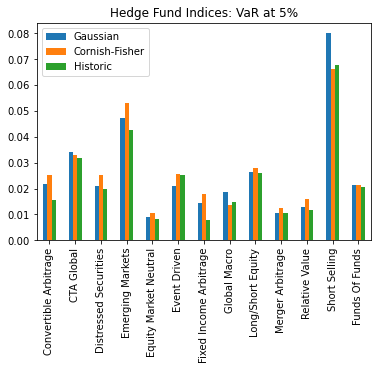

In [183]:
var_table = [var_gaussian(hfi), 
             var_gaussian(hfi, modified=True), 
             var_historic(hfi)]
comparison = pd.concat(var_table, axis=1)
comparison.columns=['Gaussian', 'Cornish-Fisher', 'Historic']
comparison.plot.bar(title="Hedge Fund Indices: VaR at 5%")

Note that in some cases, the cornish-fisher VaR is lower i.e. estimates a smaller loss than you would get from a pure gaussian assumption. That can happen if the observed skewness is positive, as is the case for "Short Selling" and "Global Macro"

In [184]:
skewness(hfi).sort_values(ascending=False)

Global Macro              0.982922
Short Selling             0.767975
CTA Global                0.173699
Funds Of Funds           -0.361783
Long/Short Equity        -0.390227
Emerging Markets         -1.167067
Distressed Securities    -1.300842
Merger Arbitrage         -1.320083
Event Driven             -1.409154
Relative Value           -1.815470
Equity Market Neutral    -2.124435
Convertible Arbitrage    -2.639592
Fixed Income Arbitrage   -3.940320
dtype: float64

# II. Markowitz Optimisation and the Efficient Frontier:

## 1. The Efficient Frontier:

In [210]:
import pandas as pd
ind = pd.read_csv('data\\ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')

In [194]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [195]:
ind.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [211]:
ind.columns = ind.columns.str.strip()
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [197]:
ind.shape

(1110, 30)

<AxesSubplot:>

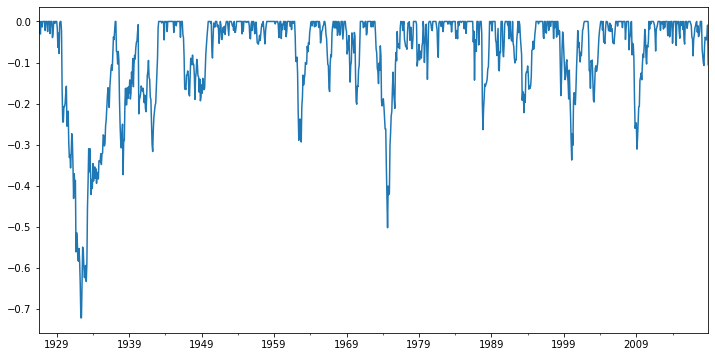

In [212]:
drawdown(ind["Food"])["Drawdown"].plot.line(figsize=(12,6))

In [213]:
var_gaussian(ind[["Food", "Beer", "Smoke", "Fin"]], modified=True)

Food     0.061207
Beer     0.033881
Smoke    0.080292
Fin      0.075199
dtype: float64

In [214]:
var_gaussian(ind, modified=True).sort_values().tail()

Carry    0.094527
Meals    0.098403
BusEq    0.099377
Games    0.100701
Mines    0.102782
dtype: float64

In [215]:
var_gaussian(ind, modified=True).sort_values().head()

Beer     0.033881
Coal     0.047359
Food     0.061207
Telcm    0.064719
Hshld    0.064886
dtype: float64

<AxesSubplot:>

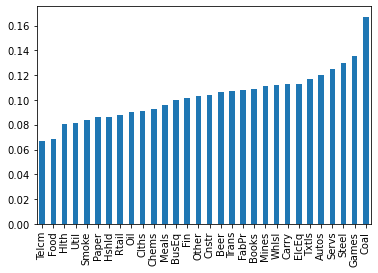

In [202]:
var_gaussian(ind).sort_values().plot.bar()

In [203]:
def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

def annualize_vol(r, periods_per_year):
    """
    Annualizes the vol of a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    return r.std()*(periods_per_year**0.5)

def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Computes the annualized sharpe ratio of a set of returns
    """
    # convert the annual riskfree rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol

In [204]:
sharpe_ratio(ind, 0.03, 12).sort_values()

Coal     0.084275
Steel    0.126052
Whlsl    0.143494
Other    0.160862
Mines    0.177109
Books    0.192686
Games    0.194420
Txtls    0.194906
Trans    0.214624
Autos    0.227548
Cnstr    0.229351
FabPr    0.265297
Servs    0.267263
Fin      0.282243
Carry    0.285916
ElcEq    0.293063
Clths    0.293105
Util     0.306945
Hshld    0.307349
Oil      0.330358
Meals    0.332717
BusEq    0.342974
Chems    0.344903
Beer     0.351780
Rtail    0.364325
Paper    0.364722
Telcm    0.383294
Hlth     0.437783
Smoke    0.446361
Food     0.454770
dtype: float64

<AxesSubplot:title={'center':'Industry Sharpe Ratios 1926-2018'}>

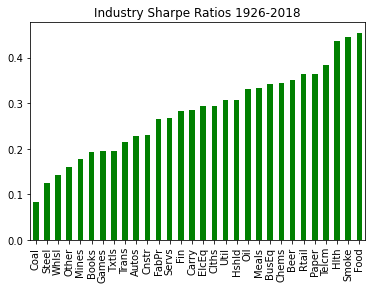

In [216]:
sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratios 1926-2018", color="green")

<AxesSubplot:title={'center':'Industry Sharpe Ratios since 2000'}>

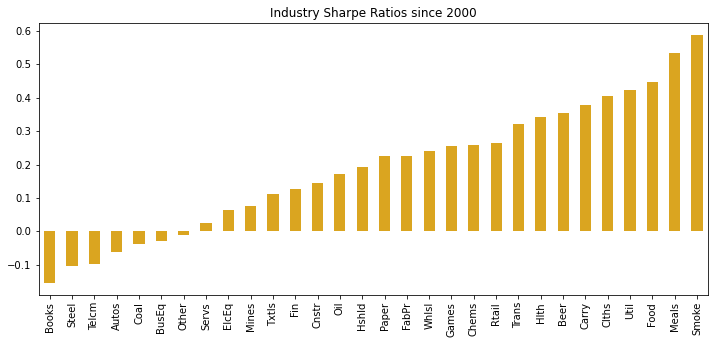

In [217]:
sharpe_ratio(ind["2000":], 0.03, 12).sort_values().plot.bar(title='Industry Sharpe Ratios since 2000', figsize=(12,5), color="goldenrod")

### - Expected Returns and the Covariance Matrix:

Generating the efficient frontier requires a set of expected returns and a covariance matrix. For now, let's assume that we can estiamte these simply by looking back in time and naively assuming they will hold in the future. Clearly, they will not, but we will have plenty of time to dig into that in future lectures. For the moment, assume that our naive method of estimating these parameters will suffice.

We can generate an estimate of expected returns using the annualize_rets() function, that returns a vector of expected returns. For instance, let's generate the set of expected returns based on historic returns from the 5 year period from 1996 through 2000:

<AxesSubplot:>

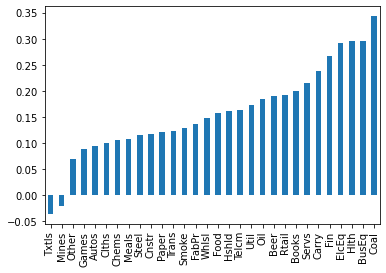

In [219]:
er = annualize_rets(ind["1995":"2000"], 12)
er.sort_values().plot.bar()

In [220]:
cov = ind["1995":"2000"].cov()
cov.shape

(30, 30)

In [234]:
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,...,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
Beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,...,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
Smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,...,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
Games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,...,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
Books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,...,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
Hshld,0.001208,0.002447,0.000981,0.001018,0.000876,0.002849,0.001046,0.001253,0.001226,0.001172,...,0.000889,0.001111,0.000906,0.001594,0.001366,0.000578,0.001157,0.001076,0.001652,0.001322
Clths,0.001474,0.001415,0.000761,0.001814,0.002037,0.001046,0.004896,0.000759,0.002547,0.002105,...,0.001263,0.001401,0.000746,0.002683,0.002466,0.001654,0.002607,0.002229,0.002699,0.001974
Hlth,0.001105,0.001689,0.000877,0.001219,0.000657,0.001253,0.000759,0.002252,0.000444,0.000538,...,0.001093,0.001390,0.001264,0.000552,0.000880,0.000907,0.000770,0.000900,0.001412,0.001099
Chems,0.001253,0.001292,0.000687,0.001547,0.001559,0.001226,0.002547,0.000444,0.002944,0.001705,...,0.000860,0.001072,0.000935,0.002581,0.001966,0.001257,0.001661,0.001425,0.002143,0.001832
Txtls,0.001021,0.001721,0.000555,0.001291,0.001362,0.001172,0.002105,0.000538,0.001705,0.002882,...,0.000790,0.000582,0.000685,0.001869,0.001760,0.001426,0.001696,0.001126,0.001789,0.001668


In [236]:
def portfolio_return(weights, returns):
    """
    Computes the return on a portfolio from constituent returns and weights
    weights are a numpy array or N x 1 matrix and returns are a numpy array or Nx1 matrix
    """
    return weights.T @ returns


def portfolio_vol(weights, covmat):
    """
    Computes the vol of a portfolio from a covariance matrix and constituent weights
    weights are a numpy array or N x 1 maxtrix and covmat is an N x N matrix
    """
    return (weights.T @ covmat @ weights)**0.5

In [237]:
l = ["Food", "Beer", "Smoke", "Coal"]
er[l]

Food     0.157362
Beer     0.190134
Smoke    0.129288
Coal     0.343089
dtype: float64

In [223]:
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002287,0.002077,0.001757,0.000034
Beer,0.002077,0.004599,0.001143,0.001261
Smoke,0.001757,0.001143,0.007130,-0.000544
Coal,0.000034,0.001261,-0.000544,0.016153


In [238]:
weights = np.repeat(0.25, 4)
portfolio_return(weights, er[l])

0.20496820684146116

In [239]:
portfolio_vol(weights, cov.loc[l,l])

0.05100412722141178

### - The 2-Asset Frontier:

In the case of 2 assets, the problem is somewhat simplified, since the weight of the second asset is 1-the weight of the first asset.

Let's write a function that draws the efficient frontier for a simple 2 asset case.

Start by generating a sequence of weights in a list of tuples. Python makes it easy to generate a list by using something called a list comprehension ... which you can think of as an efficient way to generate a list of values instead of writing a for loop.

In [245]:
import numpy as np

n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]

In [254]:
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [246]:
type(weights)

list

In [247]:
len(weights)

20

In [248]:
weights[0]

array([0., 1.])

In [249]:
weights[4]

array([0.21052632, 0.78947368])

In [250]:
weights[19]

array([1., 0.])

In [255]:
l

['Fin', 'Beer']

<AxesSubplot:xlabel='V', ylabel='R'>

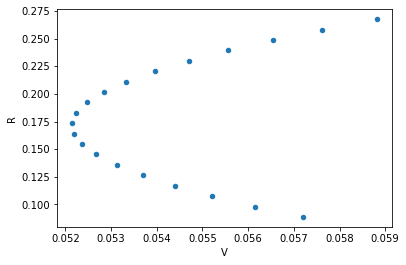

In [251]:
l = ["Games", "Fin"]
rets = [portfolio_return(w, er[l]) for w in weights]
vols = [portfolio_vol(w, cov.loc[l,l]) for w in weights]
ef = pd.DataFrame({"R": rets, "V": vols})
ef.plot.scatter(x="V", y="R")

We can create function that plots the frontier:

In [258]:
def plot_ef2(n_points, er, cov):
    """
    Plots the 2-asset efficient frontier
    """
    if er.shape[0] != 2 or er.shape[0] != 2:
        raise ValueError("plot_ef2 can only plot 2-asset frontiers")
    weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    return ef.plot.line(x="Volatility", y="Returns", style=".-")

<AxesSubplot:xlabel='Volatility'>

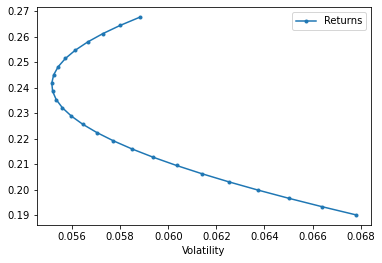

In [259]:
l = ["Fin", "Beer"]
plot_ef2(25, er[l].values, cov.loc[l,l])

### - N-Asset Efficient Frontier:

In order to plot the frontier for portfolios with more than 2 assets, we need to find the weights of the portfolio on the efficient frontier.

We start by creating the same sort of function that we already created for the 2 asset case:

In [275]:
def plot_ef(n_points, er, cov):
    """
    Plots the multi-asset efficient frontier
    """
    weights = minimize_vol(target_return) # we need to implement: optimal_weights(n_points, er, cov)
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    return ef.plot.line(x="Volatility", y="Returns", style='.-')

<AxesSubplot:xlabel='Volatility'>

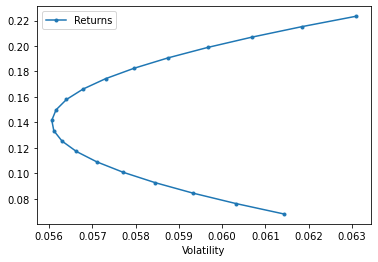

In [279]:
l = ["Games", "Fin"]
plot_ef2(20, er[l], cov.loc[l,l])

In [276]:
ind = get_ind_returns()
er = annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In order to find the optimal weights, we need a function that will minimize the volatility for a given level of return.

In [280]:
from scipy.optimize import minimize

def minimize_vol(target_return, er, cov):
    """
    Returns the optimal weights that achieve the target return
    given a set of expected returns and a covariance matrix
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
    # construct the constraints
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    return_is_target = {'type': 'eq',
                        'args': (er,),
                        'fun': lambda weights, er: target_return - portfolio_return(weights,er)
    }
    results = minimize(portfolio_vol, init_guess,
                       args=(cov,), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,return_is_target),
                       bounds=bounds)
    return results.x

Let's use this to recreate the result we got from frontier for the 2-Asset optimization between "Games" and "Fin". Let's plot that efficient frontier as we did last time:

<AxesSubplot:xlabel='Volatility'>

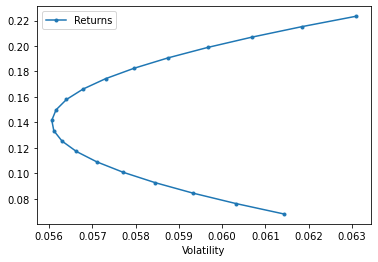

In [281]:
l = ["Games", "Fin"]
plot_ef2(20, er[l], cov.loc[l,l])

The Efficient Frontier for the protfolio that has a target return of 0.15 is approx 0.056, so let's see if our optimizer is able to locate it.

In [282]:
weights_15 = minimize_vol(0.15, er[l], cov.loc[l,l])
vol_15 = portfolio_vol(weights_15, cov.loc[l,l])
vol_15

0.056163669406706564

In [283]:
weights_15 

array([0.47287631, 0.52712369])

Now that we can find the weights to minimize the vol given a target return, we can plot the efficient frontier by dividing up the range from the highest to the lowest possible return into a grid, and finding the portfolio that targets the minimum volatility given a particular targeted rate of return.

In [273]:
def optimal_weights(n_points, er, cov):
    """
    """
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights

def plot_ef(n_points, er, cov):
    """
    Plots the multi-asset efficient frontier
    """
    weights = optimal_weights(n_points, er, cov) # not yet implemented!
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    return ef.plot.line(x="Volatility", y="Returns", style='.-')

<AxesSubplot:xlabel='Volatility'>

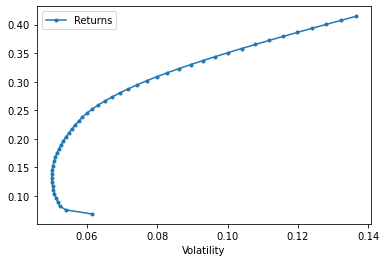

In [274]:
l = ["Smoke", "Fin", "Games", "Coal"]
plot_ef(50, er[l], cov.loc[l,l])